# Differential Privacy Simulation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ensure inline plotting for Jupyter Notebook
%matplotlib inline

# <span style="color:red;">---------------------------------------Lab Portion----------------------------------------</span>

## Generate Mock Census Dataset

In [ ]:
# Set random seed for reproducibility
np.random.seed(531)

# Define population size
population_size = 10000

# Define ethnicity categories and corresponding proportions (mock American demographics)
ethnicities = ['White', 'Hispanic', 'Black', 'Asian', 'Native American', 'Other']
proportions_ethnicity = [0.60, 0.18, 0.12, 0.06, 0.01, 0.03]

# Define age groups and proportions (mock age distribution)
age_groups = ['0-18', '19-35', '36-60', '60+']
age_proportions = [0.25, 0.35, 0.25, 0.15]

# Define income levels and corresponding proportions
income_levels = ['Low', 'Middle', 'High']
income_proportions = [0.40, 0.40, 0.20]

# Define urban vs rural distribution
locations = ['Urban', 'Rural']
location_proportions = [0.70, 0.30]

# Define education levels and their proportions
education_levels = ['No High School', 'High School', 'College', 'Graduate']
education_proportions = [0.15, 0.35, 0.35, 0.15]

# Generate the dataset using random choices from the defined proportions
df = pd.DataFrame({
    'Ethnicity': np.random.choice(ethnicities, size=population_size, p=proportions_ethnicity),
    'Age': np.random.choice(age_groups, size=population_size, p=age_proportions),
    'Income': np.random.choice(income_levels, size=population_size, p=income_proportions),
    'Location': np.random.choice(locations, size=population_size, p=location_proportions),
    'Education': np.random.choice(education_levels, size=population_size, p=education_proportions)
})

# Display the first 10 rows
print("Sample of Mock Dataset:")
print(df.head(10))

# Calculate and display frequency count for all ethnicities
ethnicity_counts = df['Ethnicity'].value_counts()
print("\nFrequency count for all ethnicities in the original dataset:")
print(ethnicity_counts)


Sample of Mock Dataset:
  Ethnicity    Age  Income Location    Education
0  Hispanic  19-35  Middle    Urban      College
1     White  19-35  Middle    Urban      College
2     Asian  36-60  Middle    Urban  High School
3  Hispanic  19-35  Middle    Urban  High School
4     Other  36-60     Low    Urban     Graduate
5     White  36-60     Low    Urban      College
6     White  36-60  Middle    Urban  High School
7     White   0-18  Middle    Urban     Graduate
8     White    60+     Low    Urban      College
9     White  36-60  Middle    Urban  High School

Frequency count for all ethnicities in the original dataset:
Ethnicity
White              5991
Hispanic           1780
Black              1217
Asian               594
Other               307
Native American     111
Name: count, dtype: int64


## Apply the Laplace Mechanism to Add Noise to Ethnicity Counts

In [ ]:
np.random.seed(531)

# Define Laplace mechanism function to add differential privacy noise to ethnicity counts
def apply_laplace_mechanism(counts, epsilon, sensitivity=1):
    noisy_counts = {}
    for key, value in counts.items():
        noise = np.random.laplace(loc=0, scale=sensitivity/epsilon)
        noisy_counts[key] = max(0, value + noise)  # Ensure counts don't go negative
    return noisy_counts

# set privacy budget to inject noise
epsilon_values = [0.1, 0.5, 1.0]

# Define a function to calculate percent relative error
def pct_error(orig, priv):
    if orig == 0:
        return 0  # To avoid division by zero if original count is zero
    return (priv - orig) / orig * 100.0

# Calculate and print change in representation for each ethnicity for each epsilon value

 # NOTE: To calculate the impact of representation on other variables (e.g., Income, Location),
        # you can switch out the 'ethnicity_counts' variable with counts for the desired category.
        # For example, replace 'ethnicity_counts' with 'income_counts_native_american' to focus on income levels.
for epsilon in epsilon_values:
    noisy_ethnicity_counts = apply_laplace_mechanism(ethnicity_counts.to_dict(), epsilon)

    print(f"\nChange in Representation with Epsilon = {epsilon}:")
    for ethnicity in ethnicity_counts.index:
        original_count = ethnicity_counts[ethnicity]
        noisy_count = noisy_ethnicity_counts[ethnicity]

        # Calculate change in representation
        if original_count > 0:
            change_in_representation = ((noisy_count - original_count) / original_count) * 100
        else:
            change_in_representation = 0  #  handle cases where original_count might be 0

        # Print
        print(f"Ethnicity: {ethnicity}")
        print(f" - Original Count: {original_count:.3f}")
        print(f" - Noisy Count: {noisy_count:.3f}")
        print(f" - Change in Representation (%): {change_in_representation:.2f}%\n")




Change in Representation with Epsilon = 0.1:
Ethnicity: White
 - Original Count: 5991.000
 - Noisy Count: 5995.774
 - Change in Representation (%): 0.08%

Ethnicity: Hispanic
 - Original Count: 1780.000
 - Noisy Count: 1776.574
 - Change in Representation (%): -0.19%

Ethnicity: Black
 - Original Count: 1217.000
 - Noisy Count: 1240.014
 - Change in Representation (%): 1.89%

Ethnicity: Asian
 - Original Count: 594.000
 - Noisy Count: 597.370
 - Change in Representation (%): 0.57%

Ethnicity: Other
 - Original Count: 307.000
 - Noisy Count: 339.006
 - Change in Representation (%): 10.43%

Ethnicity: Native American
 - Original Count: 111.000
 - Noisy Count: 101.436
 - Change in Representation (%): -8.62%


Change in Representation with Epsilon = 0.5:
Ethnicity: White
 - Original Count: 5991.000
 - Noisy Count: 5991.248
 - Change in Representation (%): 0.00%

Ethnicity: Hispanic
 - Original Count: 1780.000
 - Noisy Count: 1779.708
 - Change in Representation (%): -0.02%

Ethnicity: Bla

## Generate Relative Error Visualization

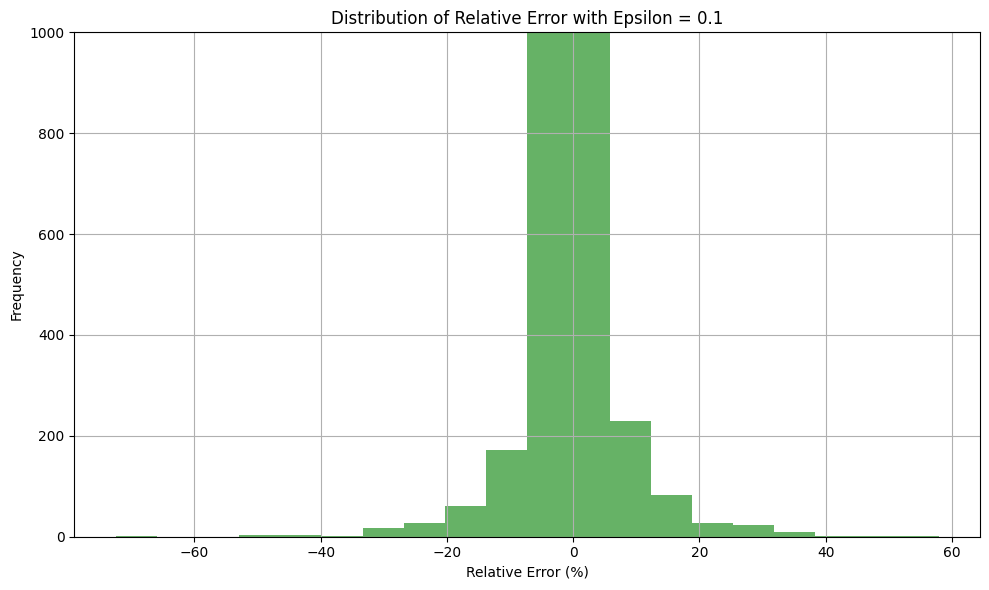

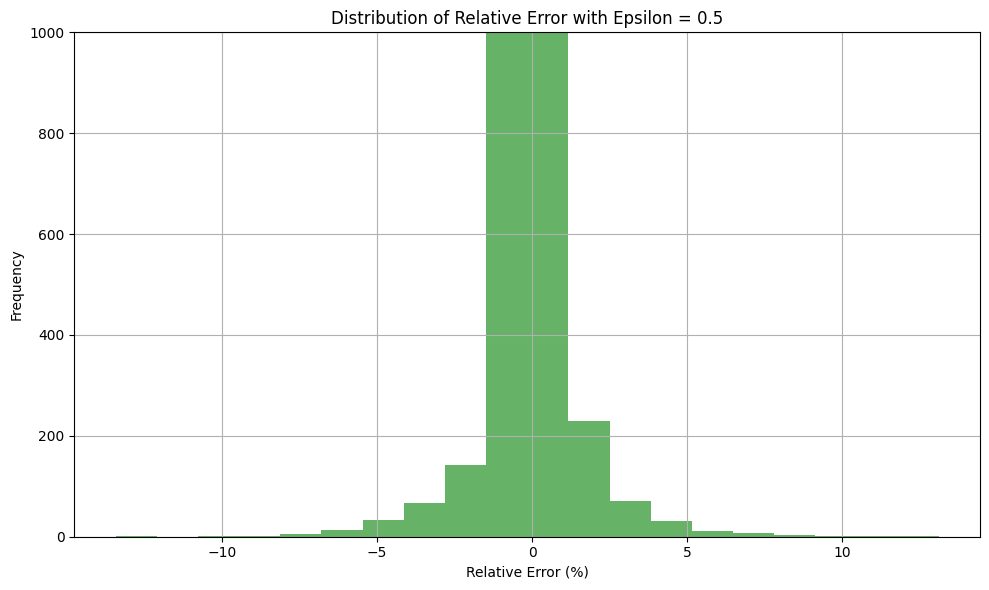

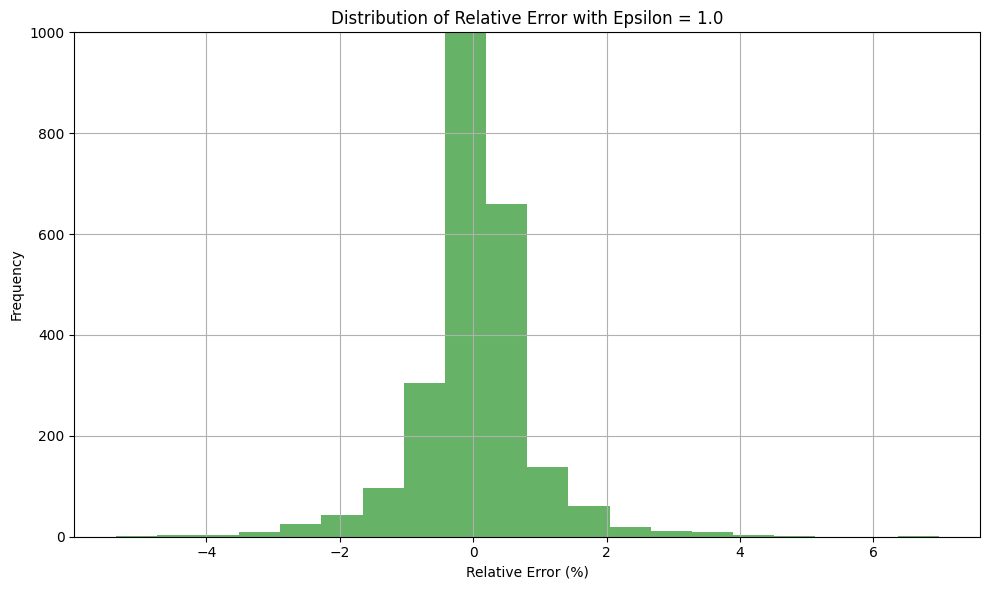

In [ ]:
# take a look at overall relative error
def graph_relative_error_histogram(original_counts, epsilon_values, num_samples=1000):
    for epsilon in epsilon_values:
        relative_errors = []

        # Generate differentially private answers and calculate relative errors
        for _ in range(num_samples):
            noisy_counts = apply_laplace_mechanism(original_counts.to_dict(), epsilon)
            for eth in original_counts.index:
                original_count = original_counts[eth]
                noisy_count = noisy_counts[eth]

                # Calculate relative error
                relative_error = pct_error(original_count, noisy_count)
                relative_errors.append(relative_error)

        # Plot histogram of relative errors
        plt.figure(figsize=(10, 6))
        plt.hist(relative_errors, bins=20, alpha=0.6, color='green')
        plt.xlabel('Relative Error (%)')
        plt.ylabel('Frequency')
        plt.title(f'Distribution of Relative Error with Epsilon = {epsilon}')
        plt.grid(True)
        plt.ylim(0, 1000)
        plt.tight_layout()
        plt.show()

# Visualize the relative error for the ethnicity counts with different epsilon values
graph_relative_error_histogram(ethnicity_counts, epsilon_values)

# <span style="color:red;">----------------------------------------END LAB----------------------------------------</span>

# <span style="color:blue">Assignment Introduction</span>

In this assignment, you will extend the concepts demonstrated in the lab portion to analyze income levels within a specific ethnic group: Native Americans. The goal is to understand how applying differential privacy impacts our analysis when focusing on a smaller, often underrepresented population group.

Specifically, you will explore how the Laplace mechanism affects the <b>income level counts</b> for Native Americans. Education and other government funding often depend on accurate data about income levels, and differential privacy can introduce noise that may distort these figures. Your task will be to determine how varying the privacy budget (epsilon) changes the accuracy of these counts and to reflect on the broader implications of these changes, particularly when allocating resources to underrepresented groups.

## Step 1: Calculate Original Counts for Income Levels


In [ ]:
# Filter dataset for Native American subgroup
native_american_data = df[df['Ethnicity'] == 'Native American']

# Get original income counts for Native Americans
income_counts_native_american = native_american_data['Income'].value_counts()

# Display original income counts (Low, MIddle, & High) for Native Americans
print("\nIncome Level Counts for Native Americans (Original Data):")
for income_level, count in income_counts_native_american.items():
    print(f"{income_level}: {count}")



Income Level Counts for Native Americans (Original Data):
Low: 45
Middle: 39
High: 27


## <span style="color:blue">Step 2:</span> Apply Laplace Mechanism to Add Noise, Try (at least) Two Different Epsilon Values

<span style="color:blue">Instructions:</span>

<b>1. Apply Laplace Mechanism to Add Noise:</b>
Use the apply_laplace_mechanism function from the lab to add noise to the income level counts of the Native American subgroup.
Calculate the noisy counts for each of the income levels (Low, Middle, High) and observe how the Laplace mechanism affects these counts.

<b>2. Try at Least Two Different Epsilon Values:</b>
Select at least two different values for epsilon (e.g., epsilon = 0.1 and epsilon = 1.0).
Epsilon is a privacy budget parameter. A smaller epsilon value provides stronger privacy guarantees but more noise, whereas a larger epsilon value provides weaker privacy guarantees but more accuracy.
For each epsilon value, add Laplace noise to the income level counts and record the noisy counts.

<b>3. Analyze the Impact of Noise:</b>
Calculate the percent relative error for each income level for each epsilon value.
Reflect on the effects of the noise injected for each epsilon value in the "Observation and Reflection" section. How does changing epsilon affect the representation and accuracy of the income level counts for the Native American subgroup?

In [ ]:


# Define Laplace mechanism function (already defined in the lab)

# Set privacy budget to inject noise
epsilon_values = [0.1, 0.5, 1.0]  # Choose two different epsilon values

# Define a function to calculate percent relative error (already defined in the lab)

# Calculate and print change in representation for each income level for each epsilon value
for epsilon in epsilon_values:
    noisy_income_counts_native_american = apply_laplace_mechanism(income_counts_native_american.to_dict(), epsilon)

    print(f"\nChange in Representation for Native American Income Levels with Epsilon = {epsilon}:")
    for income_level in income_counts_native_american.index:
        original_count = income_counts_native_american[income_level]
        noisy_count = noisy_income_counts_native_american[income_level]

        # Calculate change in representation
        if original_count > 0:
            change_in_representation = ((noisy_count - original_count) / original_count) * 100
        else:
            change_in_representation = 0  # Handle cases where original_count might be 0

        # Print
        print(f"Income Level: {income_level}")
        print(f" - Original Count: {original_count:.2f}")
        print(f" - Noisy Count: {noisy_count:.2f}")
        print(f" - Change in Representation (%): {change_in_representation:.2f}%\n")



Change in Representation for Native American Income Levels with Epsilon = 0.1:
Income Level: Low
 - Original Count: 45.00
 - Noisy Count: 46.20
 - Change in Representation (%): 2.66%

Income Level: Middle
 - Original Count: 39.00
 - Noisy Count: 32.89
 - Change in Representation (%): -15.68%

Income Level: High
 - Original Count: 27.00
 - Noisy Count: 33.87
 - Change in Representation (%): 25.46%


Change in Representation for Native American Income Levels with Epsilon = 0.5:
Income Level: Low
 - Original Count: 45.00
 - Noisy Count: 48.00
 - Change in Representation (%): 6.67%

Income Level: Middle
 - Original Count: 39.00
 - Noisy Count: 38.00
 - Change in Representation (%): -2.57%

Income Level: High
 - Original Count: 27.00
 - Noisy Count: 31.45
 - Change in Representation (%): 16.47%


Change in Representation for Native American Income Levels with Epsilon = 1.0:
Income Level: Low
 - Original Count: 45.00
 - Noisy Count: 44.68
 - Change in Representation (%): -0.72%

Income Leve

## <span style="color:blue">Step 3:</span> Generate Relative Error Histogram Visualization for Native Americans

<span style="color:blue">Instructions:</span>

Create histograms to visualize the distribution of relative errors for the income level counts of Native Americans for each value of epsilon.

<b>1.Generate 1000 differentially private samples</b> of income level counts and calculate the relative error for each one.

<b>2.Label your visualizations</b> to clearly indicate the epsilon value used.


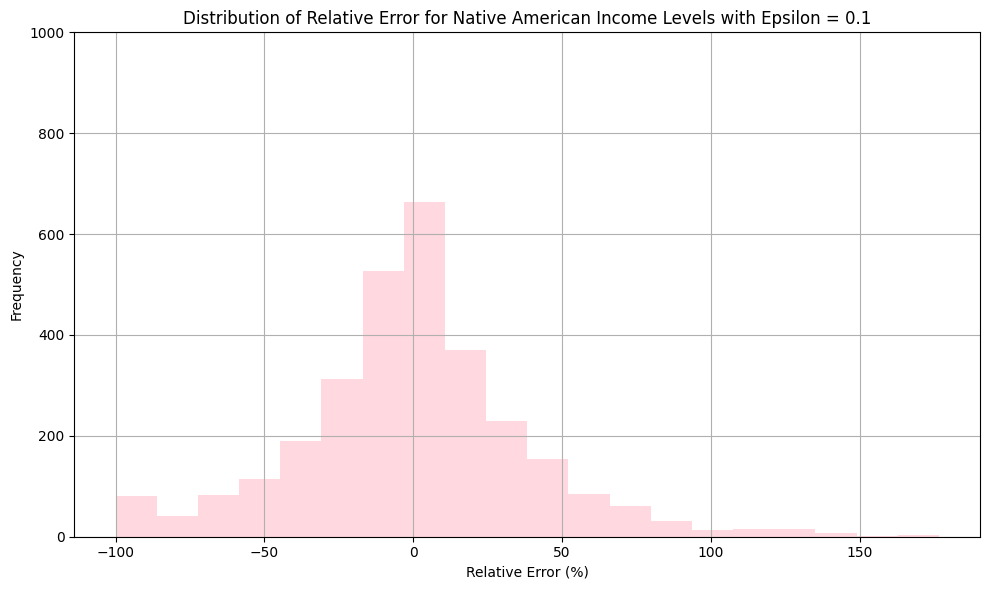

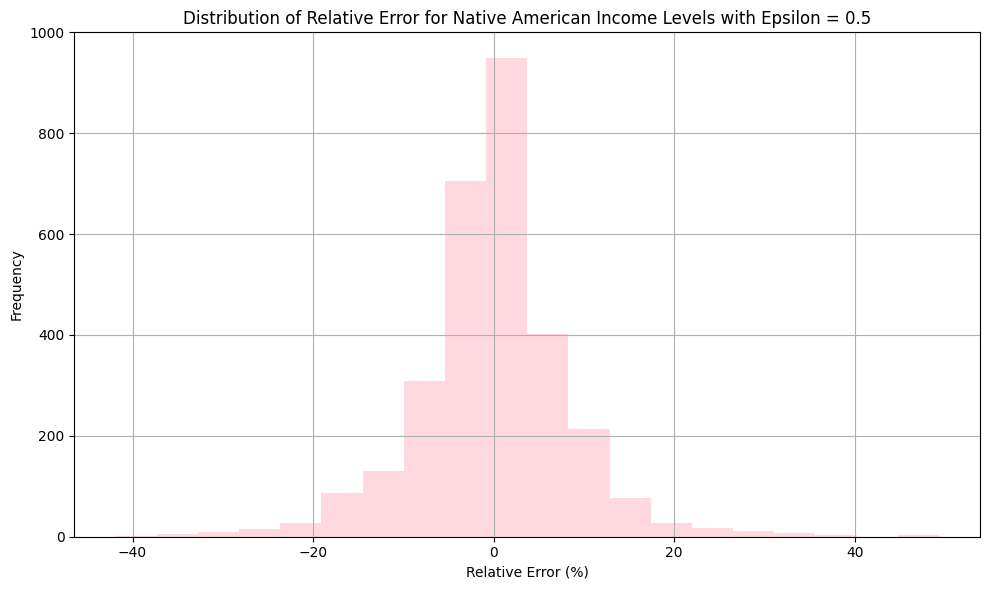

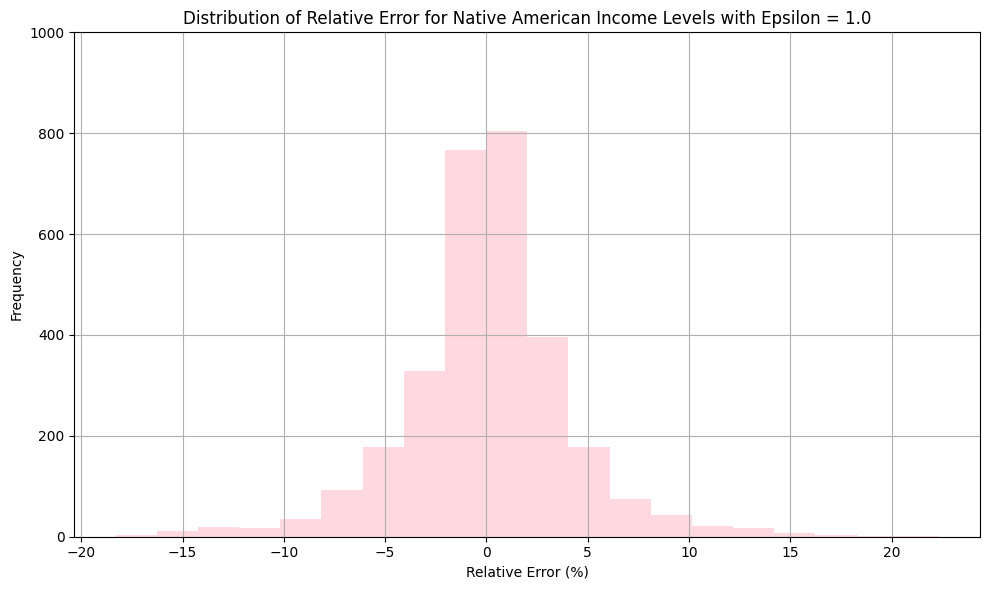

In [ ]:


import matplotlib.pyplot as plt


# Generate Relative Error Visualization for Native Americans
def graph_relative_error_histogram_native_american(original_counts, epsilon_values, num_samples=1000):
    for epsilon in epsilon_values:
        relative_errors = []

        # Generate differentially private answers and calculate relative errors
        for _ in range(num_samples):
            noisy_counts = apply_laplace_mechanism(original_counts.to_dict(), epsilon)
            for income_level in original_counts.index:
                original_count = original_counts[income_level]
                noisy_count = noisy_counts[income_level]

                # Calculate relative error
                relative_error = pct_error(original_count, noisy_count)
                relative_errors.append(relative_error)

        # Plot histogram of relative errors
        plt.figure(figsize=(10, 6))
        plt.hist(relative_errors, bins=20, alpha=0.6, color='pink')
        plt.xlabel('Relative Error (%)')
        plt.ylabel('Frequency')
        plt.title(f'Distribution of Relative Error for Native American Income Levels with Epsilon = {epsilon}')
        plt.grid(True)
        plt.ylim(0, 1000)
        plt.tight_layout()
        plt.show()

# Visualize the relative error for the income level counts of Native Americans with different epsilon values
graph_relative_error_histogram_native_american(income_counts_native_american, epsilon_values)




## <span style="color:blue">Step 4: </span>Observation and Reflection
 (to be answered in 4.1 Exercsise document)

1. <b>Briefly describe your findings. How does changing the value of epsilon affect the relative error?</b>

Findings
1. Low Epsilon (ε = 0.1) – High Privacy, High Error
Some small groups (like Native American) saw large distortions (e.g., −8.62%).
Others (like Other) had high positive noise (e.g., +10.43%).
Larger groups (e.g., White) were minimally affected due to their higher counts.
2. Medium Epsilon (ε = 0.5) – Moderate Privacy, Moderate Error
Noise was much less impactful.
Changes in representation were mostly within ±1%.
3. High Epsilon (ε = 1.0) – Low Privacy, Low Error
Minimal deviation from the original counts.
Relative errors were close to 0% for all groups.
Conclusion
Smaller subgroups are more vulnerable to distortion under differential privacy due to their lower base counts.
Higher epsilon improves accuracy but reduces privacy.
Choosing an appropriate epsilon is a trade-off between data utility and individual privacy protection.

2. <b>Is there an epsilon value that produces results useful while still providing privacy protection? Explain your reasoning.</b>

Is There an Epsilon Value That Balances Utility and Privacy?
Yes — based on the analysis, ε = 0.5 appears to provide a good balance between usefulness of the results and privacy protection.

Reasoning:
 1. Data Utility
With ε = 0.5, the relative error across all ethnic groups remained very small, mostly within ±1%.
This level of accuracy ensures that statistical trends and distributions remain reliable, making the data useful for analysis, reporting, or policymaking.
 2. Privacy Protection
While ε = 0.5 offers less privacy than ε = 0.1, it still provides a meaningful layer of protection:
The noise is enough to mask individual contributions, especially in large datasets like this (10,000 rows).
It's suitable for aggregate reporting where individual identification risk is relatively low.
 ε = 0.1 — Too Noisy
Causes high distortion, especially in small groups (e.g., +10% or −8% errors).
May misrepresent underrepresented communities and lead to inaccurate conclusions.
 ε = 1.0 — Too Weak for Strong Privacy Needs
Offers high utility but weaker protection — not ideal if sensitive personal data is involved or if adversaries have auxiliary information.
 Conclusion
Epsilon = 0.5 is a practical middle ground:
It preserves the structure and usefulness of the data while still maintaining a reasonable level of privacy.

This value is often recommended in practice (e.g., in research papers and DP libraries) as a starting point, with adjustments based on the sensitivity of the data and use case context.

3. <b>Discuss how the trade-offs between privacy and data utility in differential privacy might impact smaller communities in a dataset. How might the added noise impact decision-making, especially in the context of census data?</b>

Impact of Differential Privacy on Smaller Communities and Decision-Making
 Privacy vs. Utility Trade-Off: The Core Issue
Differential Privacy (DP) works by injecting random noise into datasets to protect individuals' identities. However, this comes with a trade-off:

More noise (lower ε) → better privacy, but less accurate data.
Less noise (higher ε) → better data utility, but weaker privacy.
This trade-off can significantly impact the representation and visibility of smaller communities in datasets like the census.

Why Smaller Communities Are More Affected
Lower Base Counts

When a group is small (e.g., only a few hundred people), even a small amount of noise can drastically distort its size.
Example from your analysis: With ε = 0.1, Native American representation dropped by −8.62%, while larger groups like White barely changed.
Higher Relative Error

A change of ±10 in a group of 100 is a 10% shift.
The same ±10 in a group of 10,000 is only 0.1% — negligible.
Risk of Underrepresentation

If noise reduces a small group's count, they may appear statistically insignificant or even disappear from summaries or visualizations.
 Implications for Decision-Making Policy & Resource Allocation
Census data is used to allocate funding, plan public services, and draw voting districts.
If smaller communities are underreported due to noise, they may receive less funding, fewer services, or inadequate representation.
Health & Education Programs
Demographic data helps in designing targeted programs for minority health care, language education, or cultural services.
Noise-distorted counts could lead to misguided policies or missed needs.
 Legal Protections
Under laws like the Voting Rights Act, accurate representation of minority communities is essential.
If differential privacy masks population shifts, it could impact legal safeguards tied to demographic thresholds.
Conclusion
Differential Privacy can unintentionally marginalize already small or vulnerable groups.
When applying DP to datasets like the census, it's essential to:

Use carefully chosen ε values (like 0.5 for balance).
Consider group size when designing noise mechanisms.
Implement post-processing checks to ensure that minority groups aren't erased or misrepresented.

Post-processing ensures that privacy does not come at the cost of fairness. It helps:

Identify and fix biases introduced by noise
Protect visibility of small or vulnerable groups
Maintain data utility for policy and analysis
